# Introduction to Machine Learning

In [1]:
# !git clone https://github.com/gusseppe/master_artificial_intelligence
# !cp -r /content/master_artificial_intelligence/Introduction_to_Machine_Learning/deliverables/work1/iml/* .

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.io import arff
from scipy import stats

import tools.eda as eda
import tools.preprocess as prep

from sklearn.metrics import adjusted_mutual_info_score, mutual_info_score, \
                            silhouette_score, adjusted_rand_score, \
                            f1_score, davies_bouldin_score, confusion_matrix, \
                            accuracy_score

path = 'datasets/splice.arff'

# Parse into pandas DataFrame
df = eda.read_arff(path)
df_original = df.copy()
df.head()

attribute_1 attribute_2 attribute_3 attribute_4 attribute_5 attribute_6  \
0        b'C'        b'C'        b'A'        b'G'        b'C'        b'T'   
1        b'A'        b'G'        b'A'        b'C'        b'C'        b'C'   
2        b'G'        b'A'        b'G'        b'G'        b'T'        b'G'   
3        b'G'        b'G'        b'G'        b'C'        b'T'        b'G'   
4        b'G'        b'C'        b'T'        b'C'        b'A'        b'G'   

  attribute_7 attribute_8 attribute_9 attribute_10  ...   attribute_52  \
0        b'G'        b'C'        b'A'         b'T'  ...           b'G'   
1        b'G'        b'C'        b'C'         b'G'  ...           b'T'   
2        b'A'        b'A'        b'G'         b'G'  ...           b'A'   
3        b'C'        b'G'        b'T'         b'T'  ...           b'G'   
4        b'C'        b'C'        b'C'         b'C'  ...           b'C'   

  attribute_53 attribute_54 attribute_55 attribute_56 attribute_57  \
0         b'C'         b'C'         b'A'         b'G'         b'T'   
1         b'G'         b'C'         b'C'         b'C'         b'C'   
2         b'C'         b'G'         b'G'         b'G'         b'G'   
3         b'T'         b'T'         b'T'         b'T'         b'C'   
4         b'T'         b'T'         b'G'         b'A'         b'C'   

  attribute_58 attribute_59 attribute_60  Class  
0         b'C'         b'T'         b'G'  b'EI'  
1         b'C'         b'G'         b'C'  b'EI'  
2         b'A'         b'T'         b'G'  b'EI'  
3         b'C'         b'C'         b'C'  b'EI'  
4         b'C'         b'C'         b'T'  b'EI'  

[5 rows x 61 columns]

Dataset shape


In [3]:
target = 'Class'
y = df_original[target]

print('Num rows:', len(df))
print('Num cols:', len(df.columns))

Num rows: 3190
Num cols: 61


### Data overview

We don't have null values

In [4]:
print(df.isnull().sum())

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
attribute_6     0
attribute_7     0
attribute_8     0
attribute_9     0
attribute_10    0
attribute_11    0
attribute_12    0
attribute_13    0
attribute_14    0
attribute_15    0
attribute_16    0
attribute_17    0
attribute_18    0
attribute_19    0
attribute_20    0
attribute_21    0
attribute_22    0
attribute_23    0
attribute_24    0
attribute_25    0
attribute_26    0
attribute_27    0
attribute_28    0
attribute_29    0
attribute_30    0
               ..
attribute_32    0
attribute_33    0
attribute_34    0
attribute_35    0
attribute_36    0
attribute_37    0
attribute_38    0
attribute_39    0
attribute_40    0
attribute_41    0
attribute_42    0
attribute_43    0
attribute_44    0
attribute_45    0
attribute_46    0
attribute_47    0
attribute_48    0
attribute_49    0
attribute_50    0
attribute_51    0
attribute_52    0
attribute_53    0
attribute_54    0
attribute_55    0
attribute_

In [5]:
features = [col for col in df.columns if col != target]

# df_features = df[features]
for col in df.columns:
  categories = np.unique(df[col])
  print('Column name:', col, '| #categories:', len(categories) ,'-->', categories)

Column name: attribute_1 | #categories: 5 --> [b'A' b'C' b'D' b'G' b'T']
Column name: attribute_2 | #categories: 5 --> [b'A' b'C' b'D' b'G' b'T']
Column name: attribute_3 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_4 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_5 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_6 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_7 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_8 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_9 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_10 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_11 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_12 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_13 | #categories: 4 --> [b'A' b'C' b'G' b'T']
Column name: attribute_14 | #categories: 5 --> [b'A' b'C' b'G' b'N' b'T']
Column name: attribute_15 | 

Category frequencies

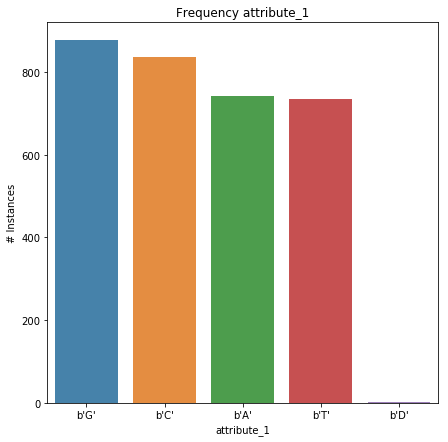

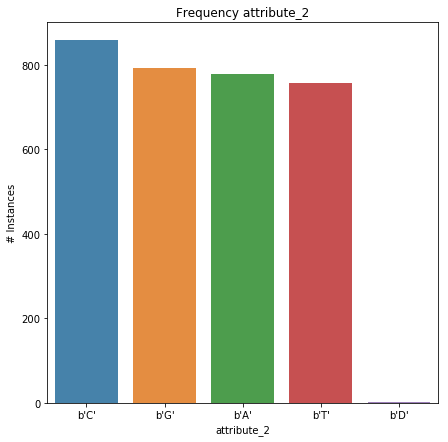

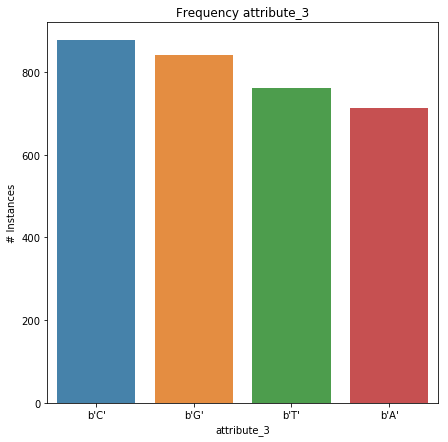

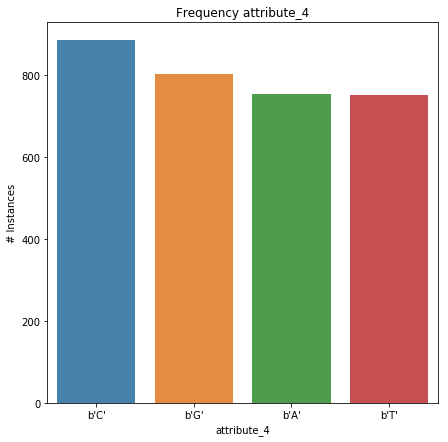

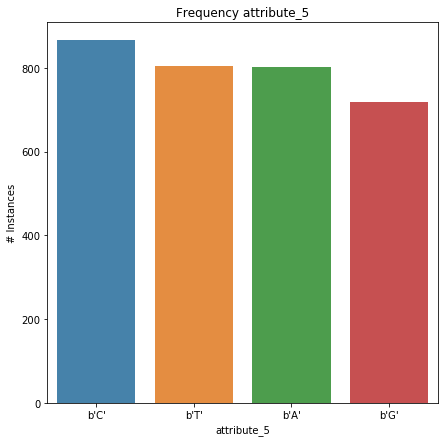

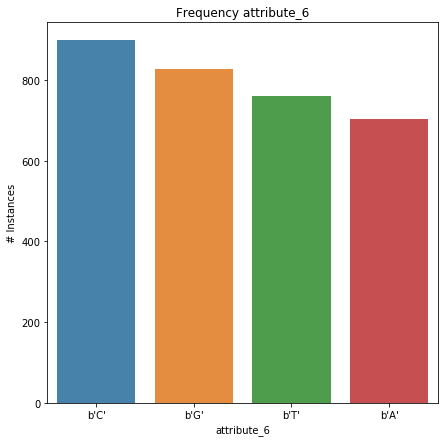

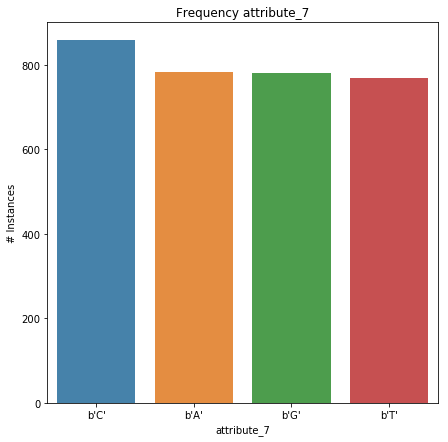

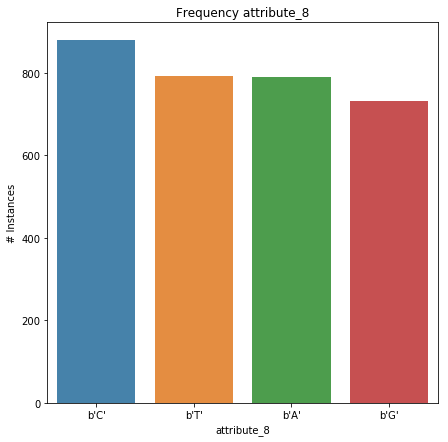

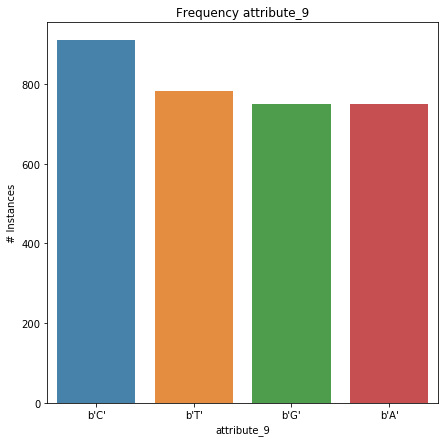

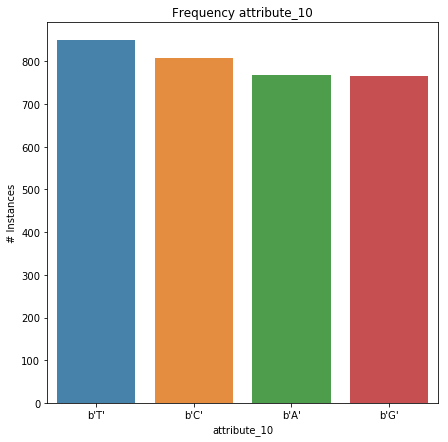

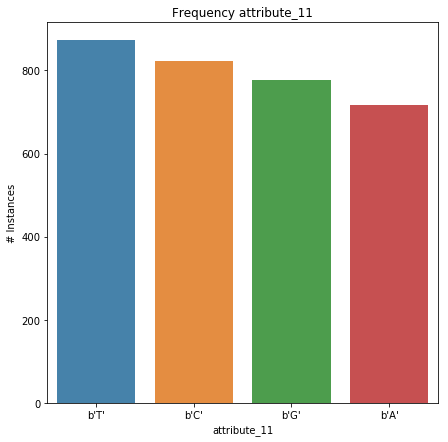

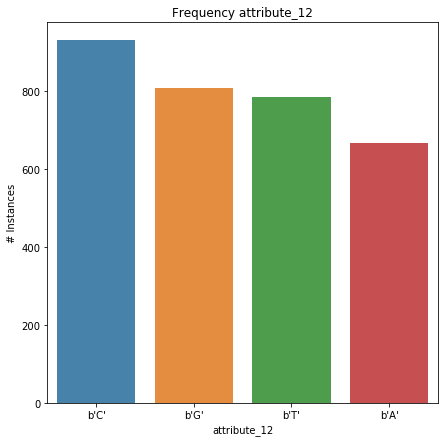

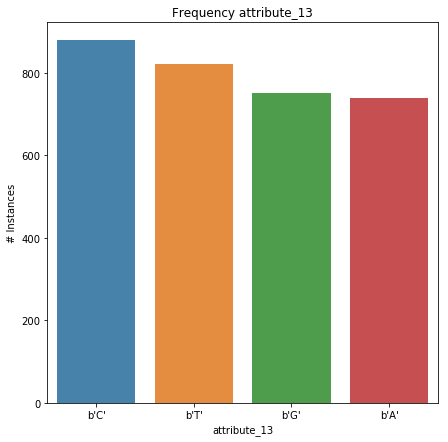

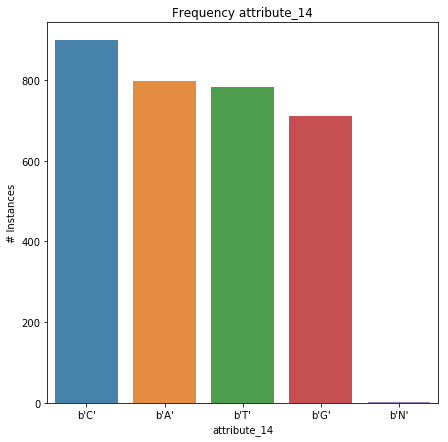

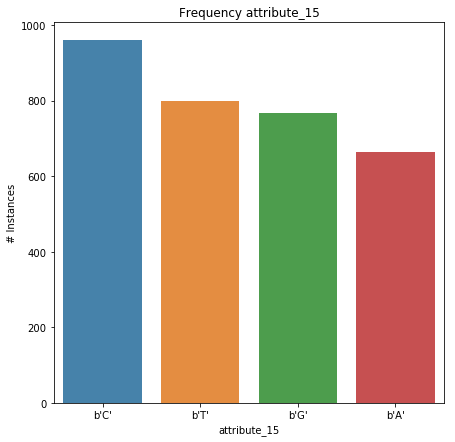

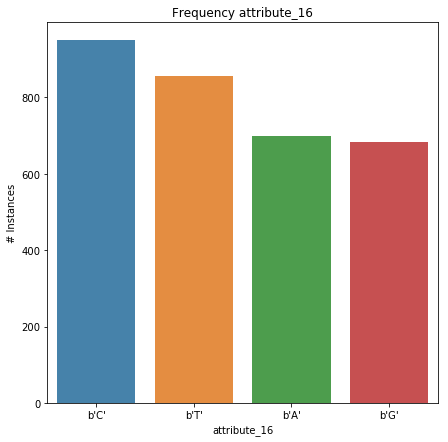

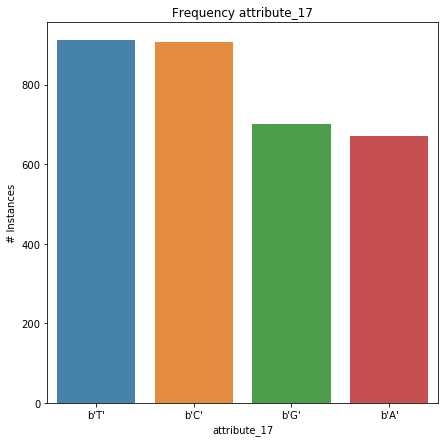

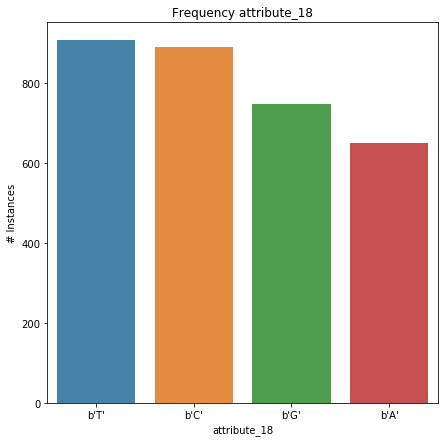

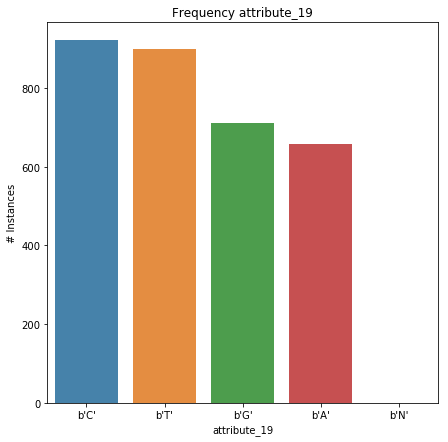

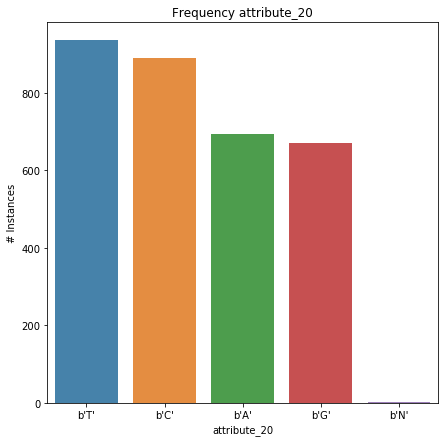

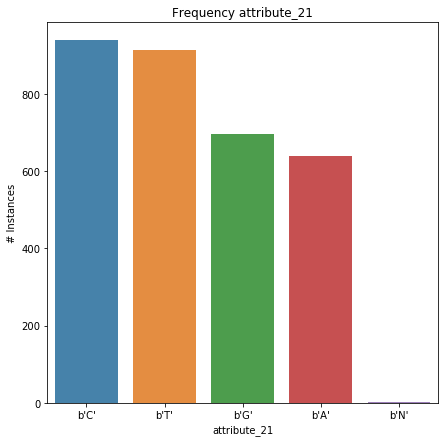

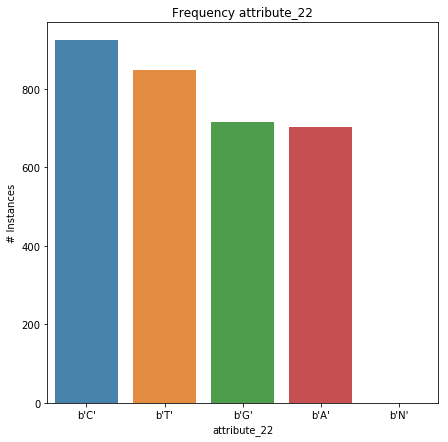

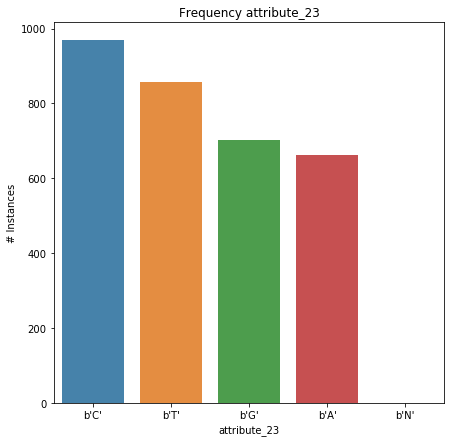

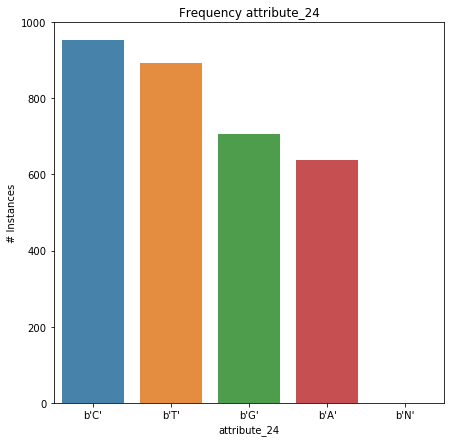

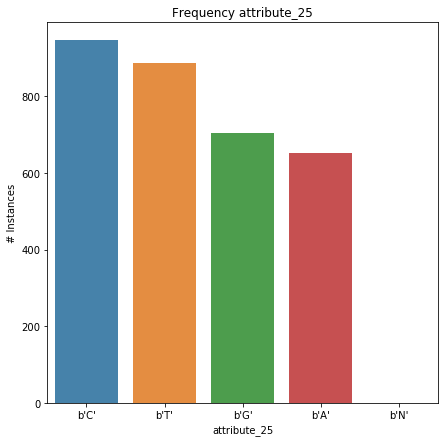

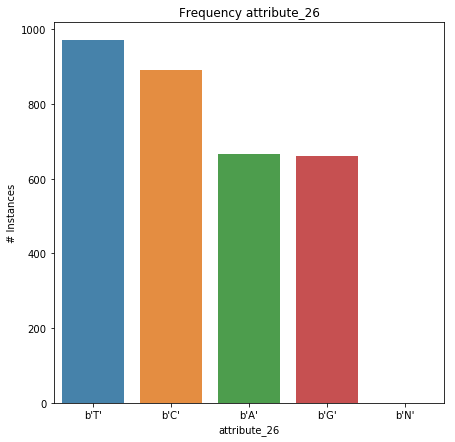

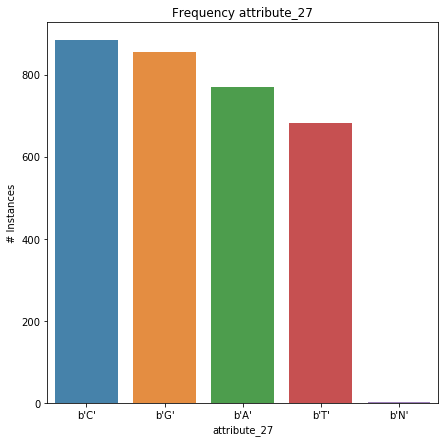

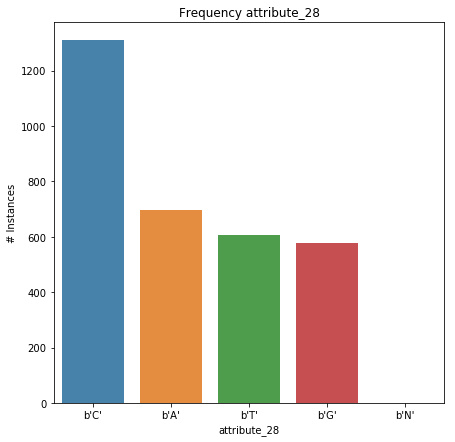

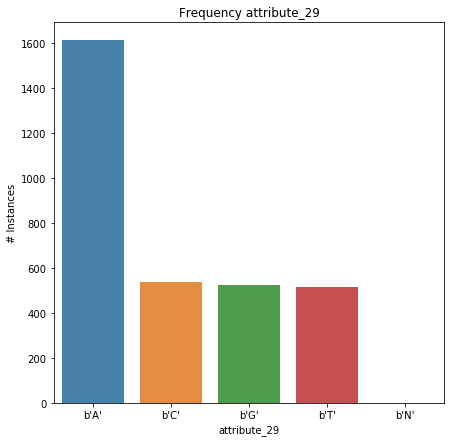

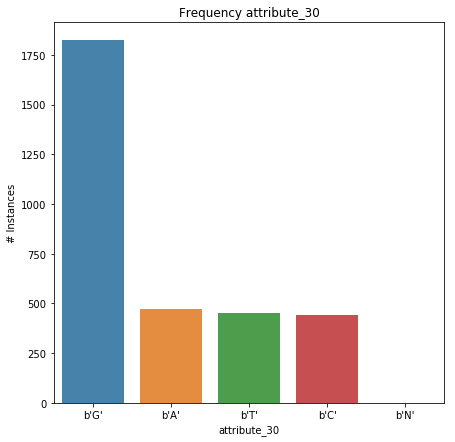

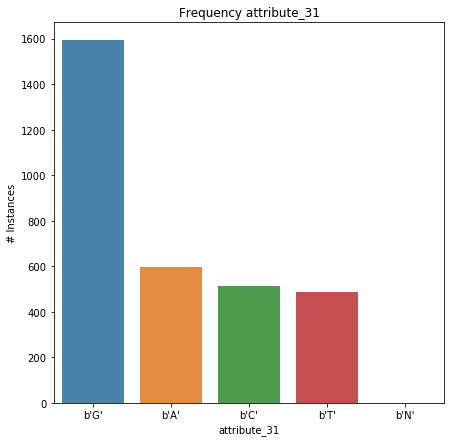

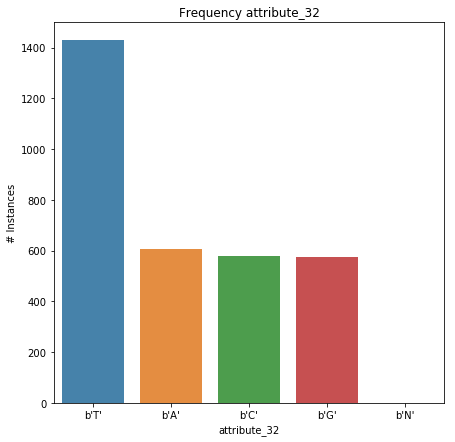

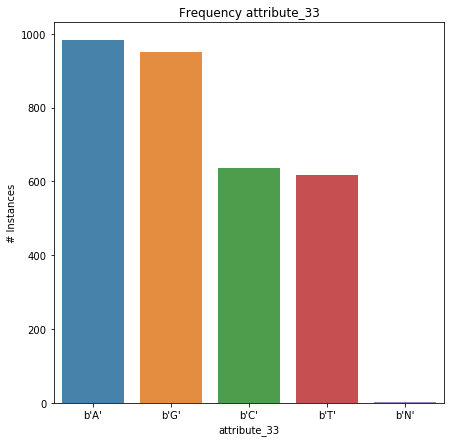

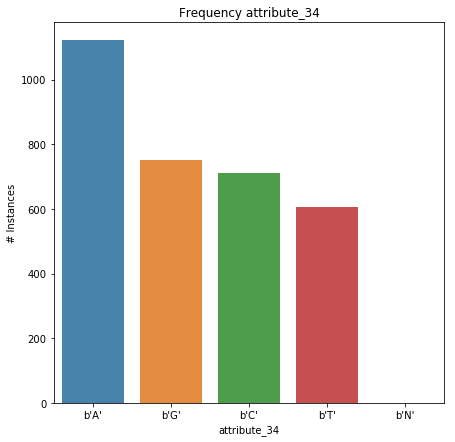

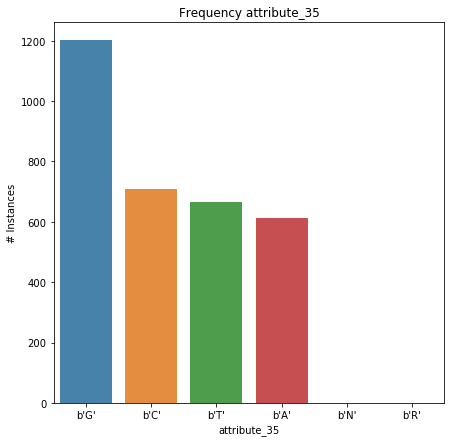

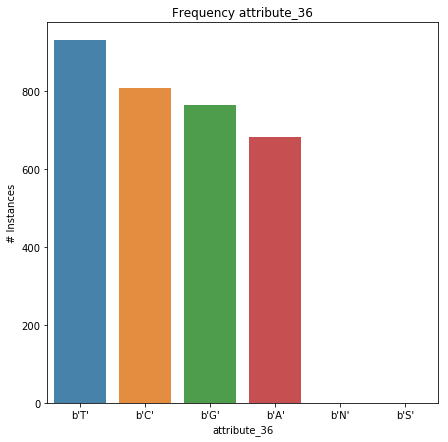

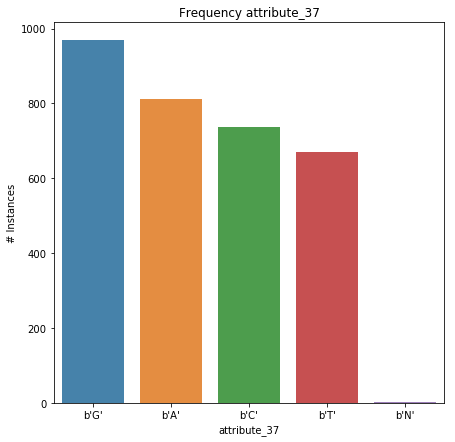

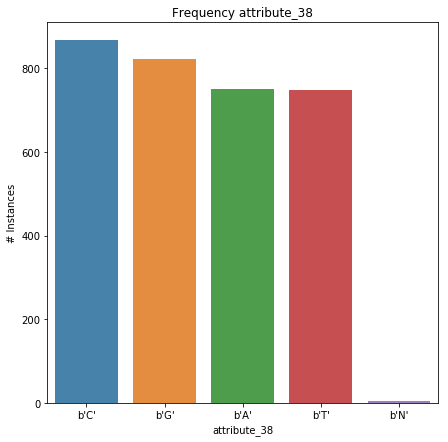

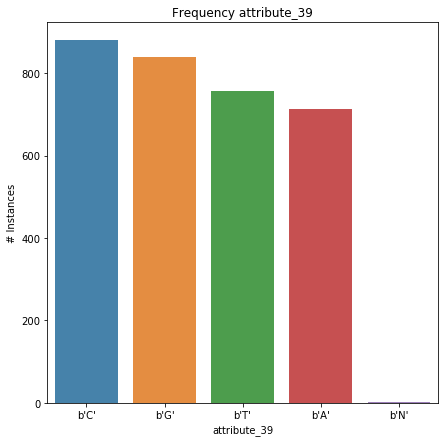

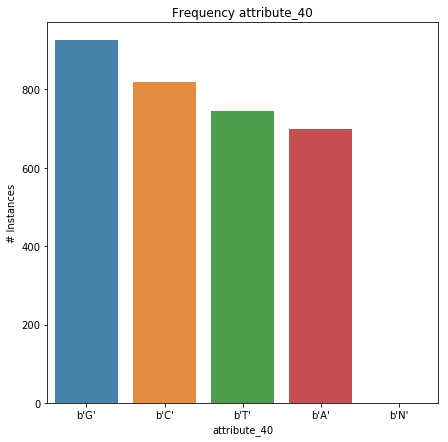

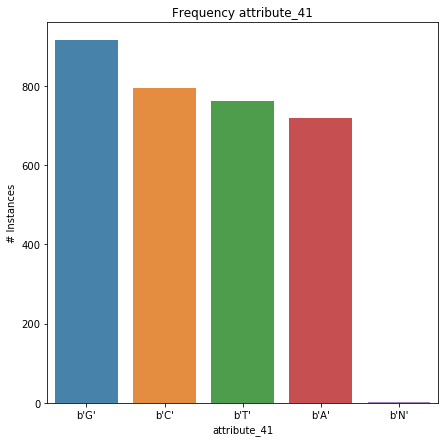

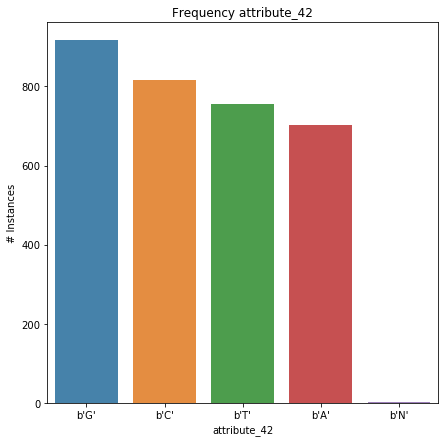

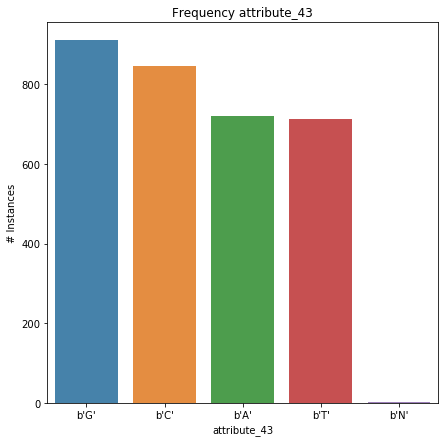

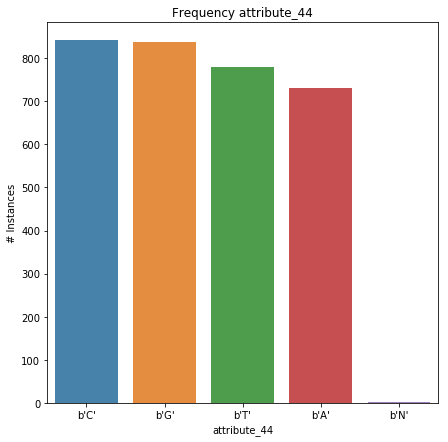

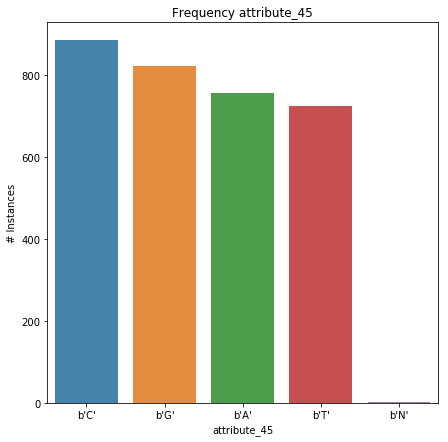

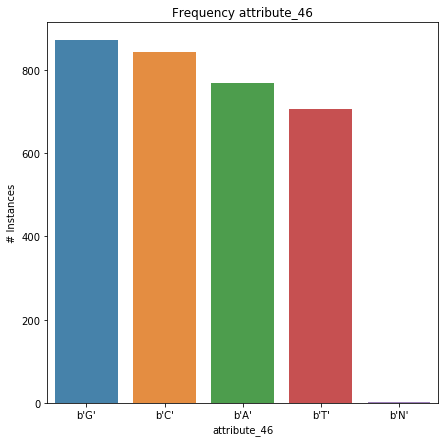

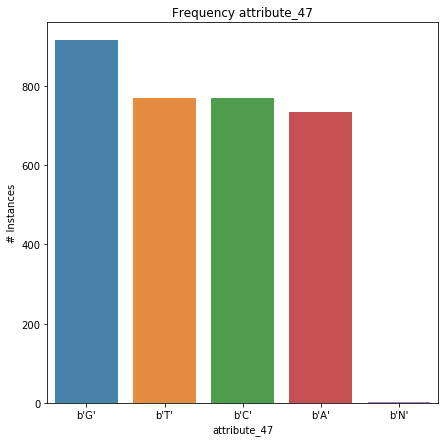

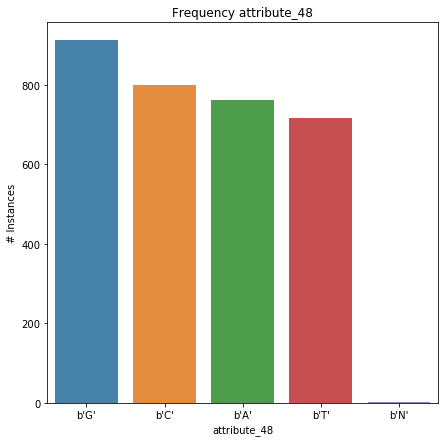

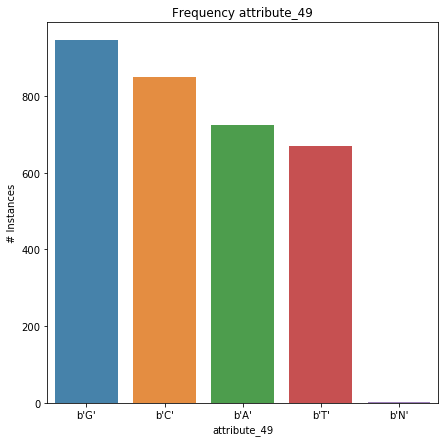

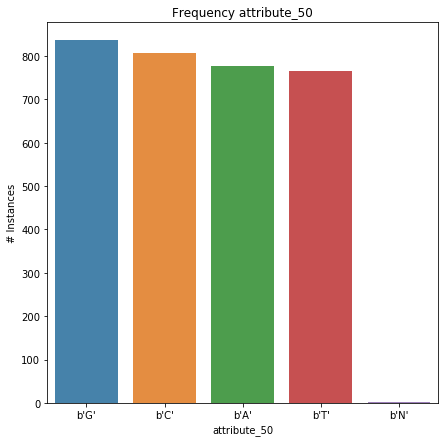

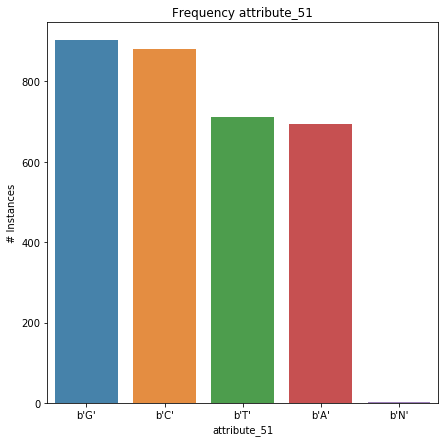

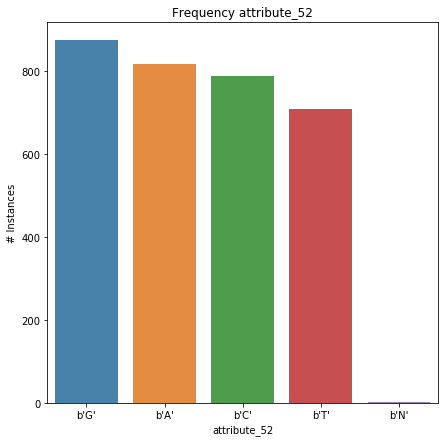

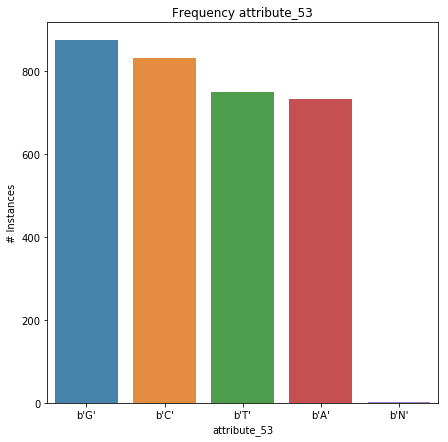

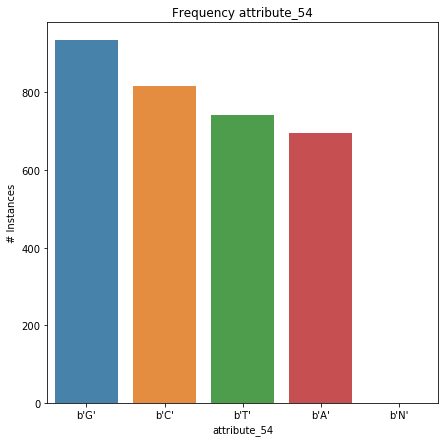

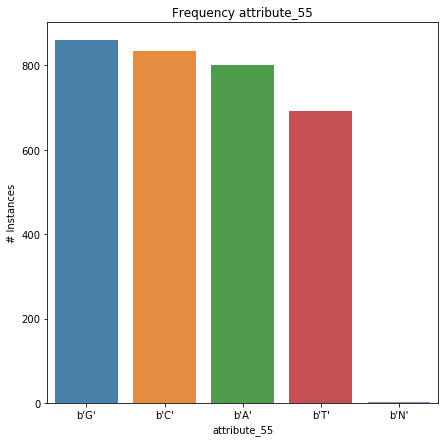

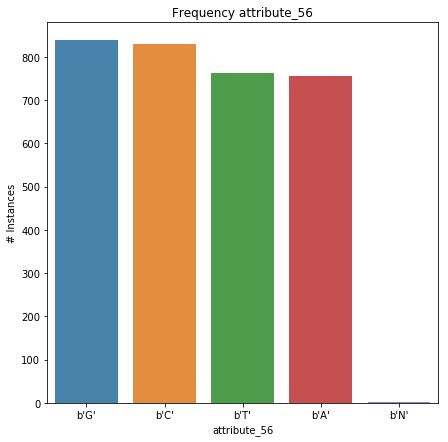

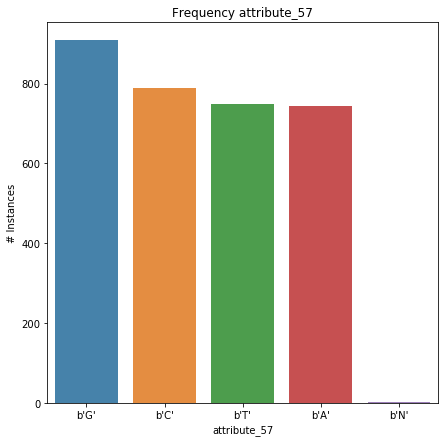

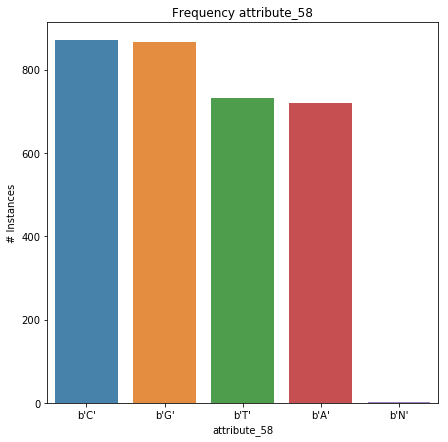

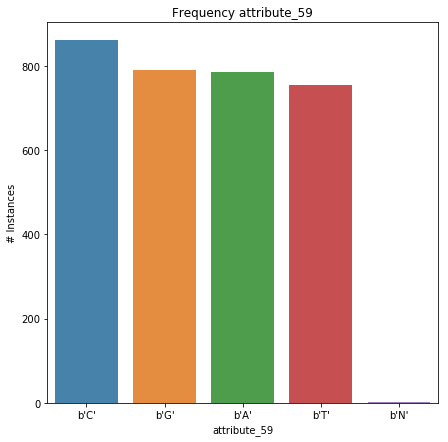

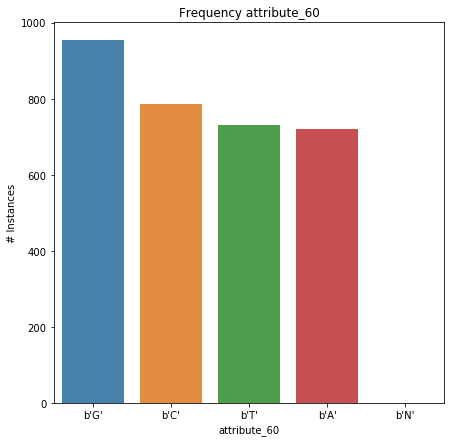

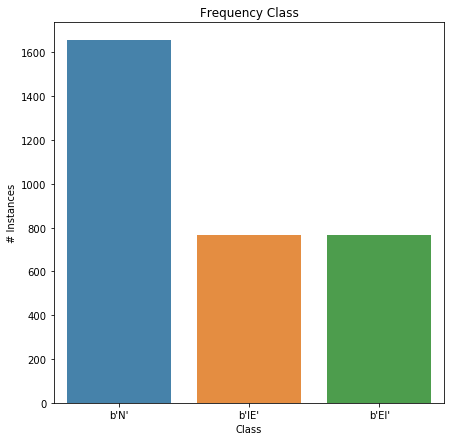

In [6]:
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize'] = (7, 7)

cat_value_counts = {}

for col in df.columns:
  cat_value_counts[col] = df[col].value_counts()
  sns.barplot(cat_value_counts[col].index, cat_value_counts[col].values, alpha=0.9)
  plt.title(f'Frequency {col}')
  plt.ylabel('# Instances')
  plt.xlabel(col)
  plt.show()

All of them except for a6 are non-binary. We are going to perform Labelling and One hot encoding for the non-binary ones.


### Label Encoding


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


features = [col for col in df.columns if col != target]

label_encoded = df.copy()
for col in df.columns:
  label_encoder = LabelEncoder()
  label_encoded[col] = label_encoder.fit_transform(df[col])

print(label_encoded.head())

   attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0            1            1            0            2            1   
1            0            3            0            1            1   
2            3            0            2            2            3   
3            3            3            2            1            3   
4            3            1            3            1            0   

   attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...    \
0            3            2            1            0             3  ...     
1            1            2            1            1             2  ...     
2            2            0            0            2             2  ...     
3            2            1            2            3             3  ...     
4            2            1            1            1             1  ...     

   attribute_52  attribute_53  attribute_54  attribute_55  attribute_56  \
0             2             1      

### On-Hot Encoding


In [8]:
onehot_encoder = OneHotEncoder(sparse=False, )
one_hot_encoding_features = [col for col in features]

onehot_encoded = onehot_encoder.fit_transform(label_encoded[one_hot_encoding_features])

df_encoded = pd.get_dummies(label_encoded,columns=one_hot_encoding_features)
df_encoded.head()

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Class  attribute_1_0  attribute_1_1  attribute_1_2  attribute_1_3  \
0      0              0              1              0              0   
1      0              1              0              0              0   
2      0              0              0              0              1   
3      0              0              0              0              1   
4      0              0              0              0              1   

   attribute_1_4  attribute_2_0  attribute_2_1  attribute_2_2  attribute_2_3  \
0              0              0              1              0              0   
1              0              0              0              0              1   
2              0              1              0              0              0   
3              0              0              0              0              1   
4              0              0              1              0              0   

        ...        attribute_59_0  attribute_59_1  attribute_59_2  \
0       ...                     0               0               0   
1       ...                     0               0               1   
2       ...                     0               0               0   
3       ...                     0               1               0   
4       ...                     0               1               0   

   attribute_59_3  attribute_59_4  attribute_60_0  attribute_60_1  \
0               0               1               0               0   
1               0               0               0               1   
2               0               1               0               0   
3               0               0               0               1   
4               0               0               0               0   

   attribute_60_2  attribute_60_3  attribute_60_4  
0               1               0               0  
1               0               0               0  
2               1               0               0  
3               0               0               0  
4               0               0               1  

[5 rows x 288 columns]

In [9]:
features_OHE = [col for col in df_encoded.columns if col != target]
df_features_OHE = df_encoded[features_OHE].copy()
df_OHE = df_encoded.copy()

features_LE = [col for col in label_encoded.columns if col != target]
df_features_LE = label_encoded[features_LE].copy()
df_LE = label_encoded.copy()

y_encoded = df_OHE[target]

Class balancing


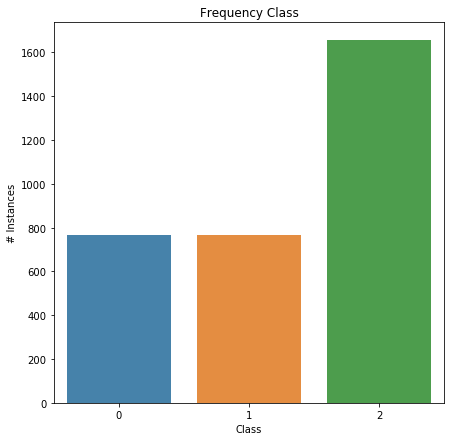

In [10]:
for col in [target]:
  cat_value_counts[col] = df_LE[col].value_counts()
  sns.barplot(cat_value_counts[col].index, cat_value_counts[col].values, alpha=0.9)
  plt.title(f'Frequency {col}')
  plt.ylabel('# Instances')
  plt.xlabel(col)
  plt.show()

### Data visualization (PCA)


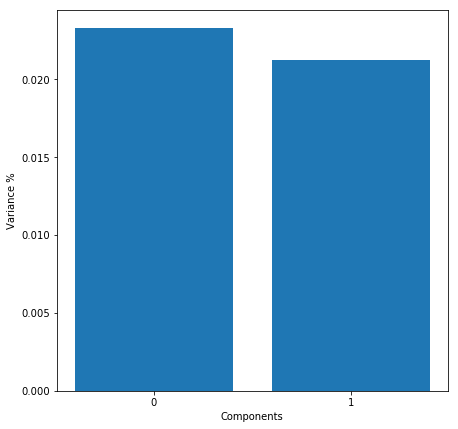

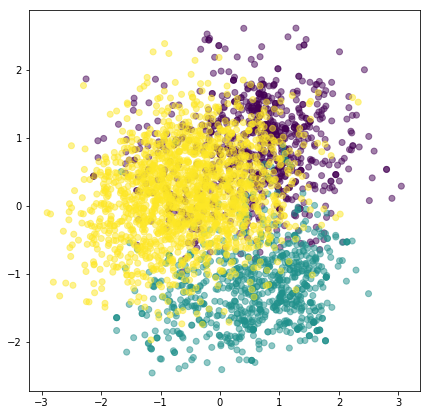

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_OHE[features_OHE])

list_components = list(range(pca.n_components_))
plt.bar(list_components, pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.xticks(list_components); plt.show()

plt.scatter(df_pca[:,0], df_pca[:,1],c=df_OHE[target], alpha=0.5)
plt.show()


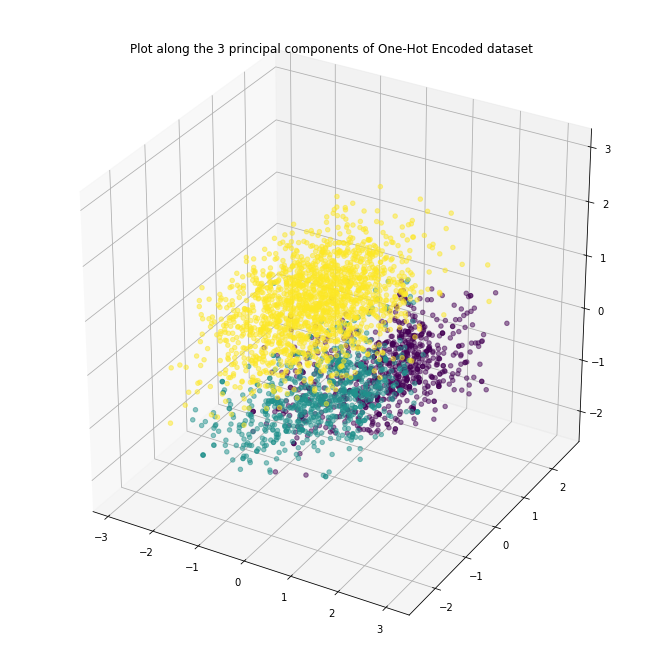

In [12]:
from mpl_toolkits.mplot3d import Axes3D
f = plt.figure(figsize=(9,9))
ax = Axes3D(f)

pca3 = PCA(n_components=3)
df_pca3 = pca3.fit_transform(df_OHE[features_OHE])

ax.scatter(df_pca3[:,0], df_pca3[:,1], df_pca3[:,2], c=df_OHE[target], alpha=0.5)
ax.set_title('Plot along the 3 principal components of One-Hot Encoded dataset')
plt.show()

### Label encoding PCA

(3190, 2)


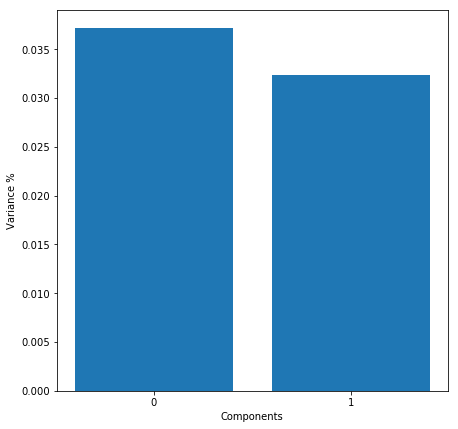

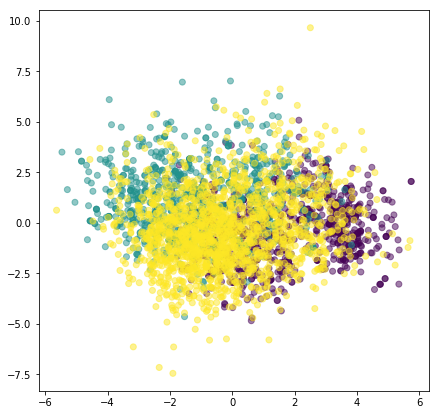

In [13]:
pca2 = PCA(n_components=2)
features_label = [col for col in df_LE.columns if col != 'class']
df_labelled = label_encoded.copy()


df_pca2 = pca2.fit_transform(df_LE[features_LE])
print(df_pca2.shape)

list_components = list(range(pca2.n_components_))
plt.bar(list_components, pca2.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.xticks(list_components); plt.show()

plt.scatter(df_pca2[:,0], df_pca2[:,1],c=df_LE[target], alpha=0.5)
plt.show()

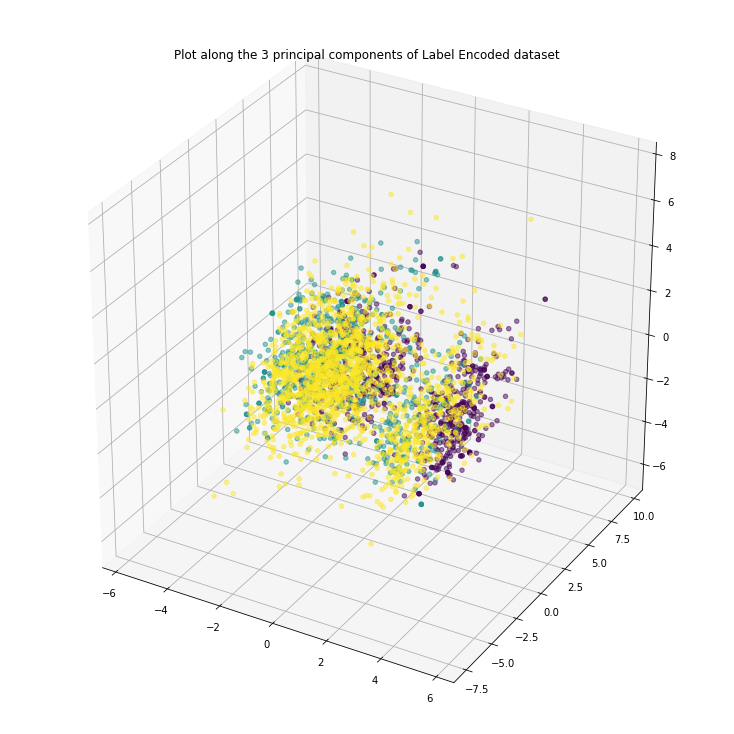

In [14]:
from mpl_toolkits.mplot3d import Axes3D
f = plt.figure(figsize=(10,10))
ax = Axes3D(f)

pca3 = PCA(n_components=3)
df_pca3 = pca3.fit_transform(df_LE[features_LE])

ax.scatter(df_pca3[:,0], df_pca3[:,1], df_pca3[:,2], c=y_encoded, alpha=0.5)
ax.set_title('Plot along the 3 principal components of Label Encoded dataset')
plt.show()

One-Hot encoding is better for visualizing the different classes

## Agglomerative K-means

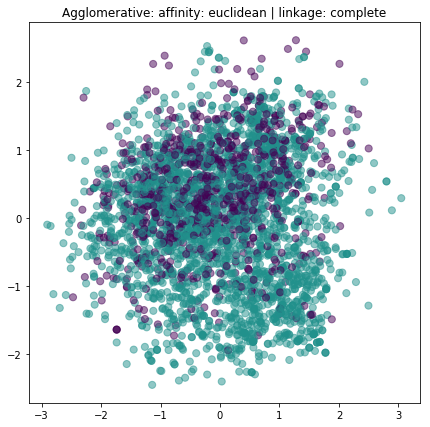

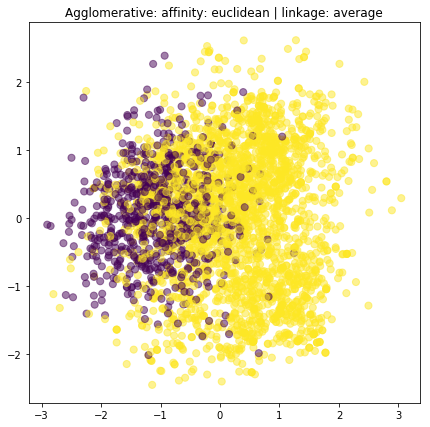

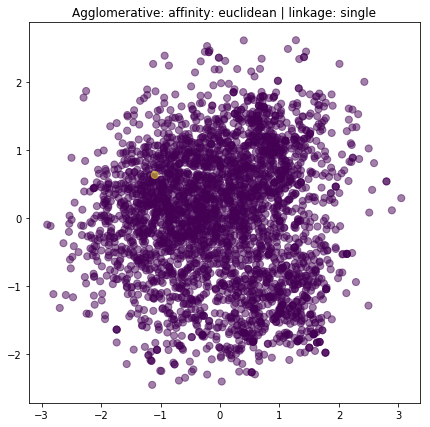

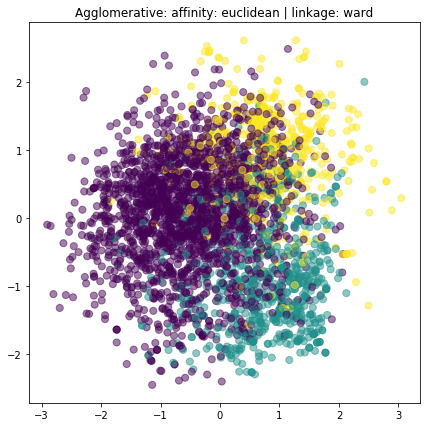

Metrics: {'ars': 0.38505483051745165, 'purity': 0.7457680250783699, 'db': 7.971057298421389, 'f-measure': 0.7457680250783698, 'silhouette': 0.0029114668679637566}


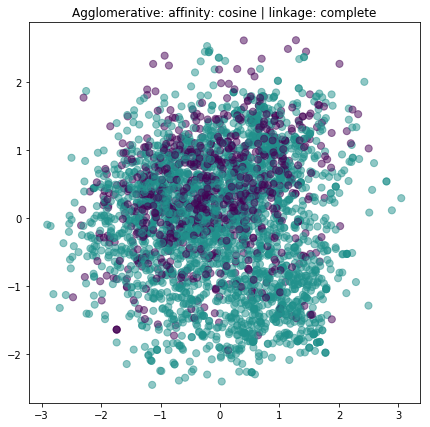

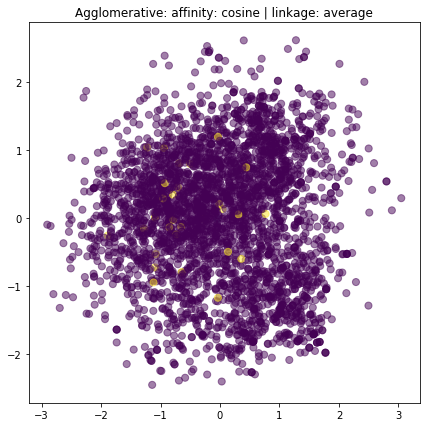

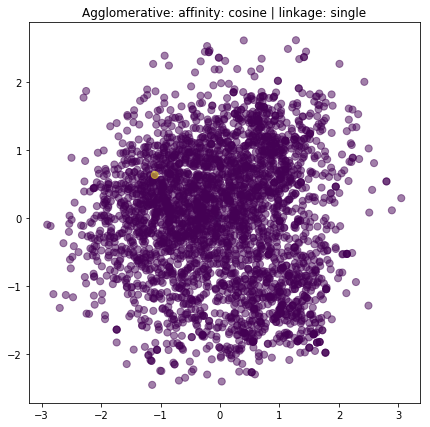

In [15]:
from sklearn.cluster import AgglomerativeClustering
from cluster.metrics import get_metrics

affinity = ['euclidean', 'cosine']
linkage = ["complete", "average", "single", "ward"]

best_clusters, best_score = None, -9999

for aff in affinity:
    if aff == 'cosine':
      linkage = ["complete", "average", "single"]  
    for link in linkage:
        agglo = AgglomerativeClustering(affinity=aff, compute_full_tree='auto',
                                        linkage=link, memory=None, n_clusters=3,
                                        pooling_func='deprecated')
        agglo.fit(df_features_OHE.values)

        score = adjusted_rand_score(df_OHE[target], agglo.labels_)
        if score > best_score:
          best_clusters = agglo.labels_
          best_score = score 
    
        plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agglo.labels_,
            s=50, cmap='viridis', alpha=0.5);

        plt.title(f'Agglomerative: affinity: {aff} | linkage: {link}')
        plt.show()
        try:
            print(f"Metrics: {get_metrics(df_OHE[target].values, agglo.labels_, df_features_OHE.values, alg='agglo')}")
        except:
            pass
agglo_clusters = best_clusters

## K-means


In [16]:
from sklearn.metrics import adjusted_mutual_info_score, mutual_info_score, silhouette_score, adjusted_rand_score


Perform K-means with one-hot encoding


In [17]:
from cluster.kmeans import KMeans

best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
for r in range(25):
  kmeans = KMeans(n_clusters=3, random_state=r)
  kmeans.fit(df_features_OHE.values)
  centroids, clusters, inertia = kmeans.centroids, kmeans.labels, kmeans.inertia
  # centroids, clusters, inertia = k_means(df_.values, k=3, random_state=r)
  score = adjusted_rand_score(y_encoded, clusters)
  if score > best_score:
    best_clusters = clusters
    best_centroids = centroids
    best_score = score 
    best_r = r
kmeans_clusters = best_clusters
best_score

0.630340200510575

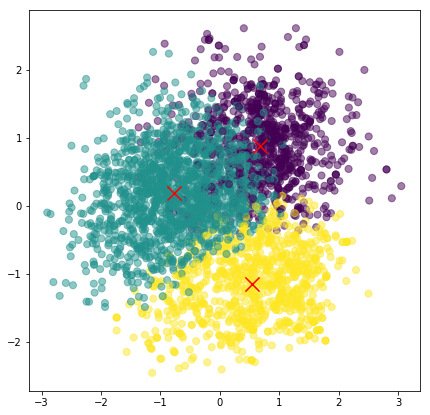

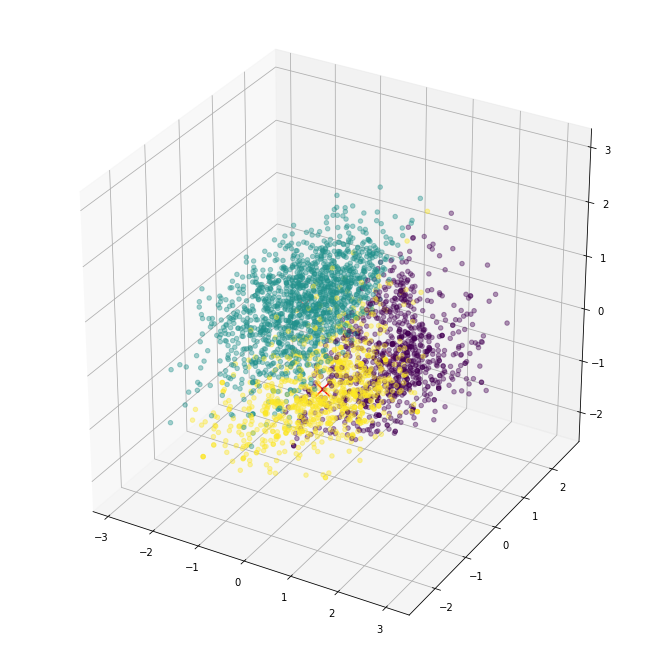

In [18]:

pca_df = pd.DataFrame(pca.transform(df_features_OHE))
plt.scatter(pca_df.values[:, 0],pca_df.values[:, 1], c=kmeans_clusters,
            s=50, cmap='viridis', alpha=0.5);
pca_centroids = pca.transform(best_centroids)
plt.scatter(pca_centroids[:,0], pca_centroids[:,1], marker='x', c='r', s=200);

f = plt.figure(figsize=(9,9))
ax = Axes3D(f)
# ax.set_title('PCA 3-d')
pca3 = PCA(n_components=3)
df_pca3 = pca3.fit_transform(df_OHE[features_OHE])
ax.scatter(df_pca3[:,0], df_pca3[:,1], df_pca3[:,2], c=kmeans_clusters, alpha=0.4)
pca3_centroids = pca3.transform(best_centroids)
ax.scatter(pca3_centroids[:,0], pca3_centroids[:,1], pca3_centroids[:,2], marker='x', c='r', s=200);
plt.show()

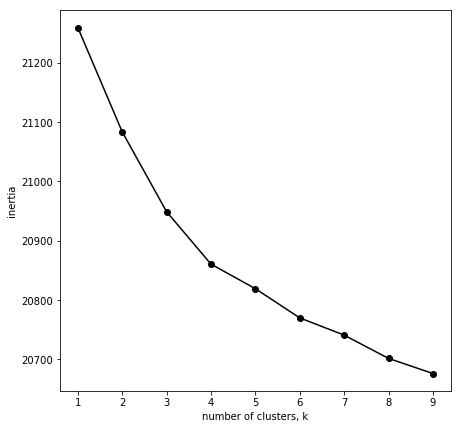

In [19]:
inertias = []

ks = list(range(1,10))
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=r)
  kmeans.fit(df_features_OHE.values)
  centroids, clusters, inertia_ = kmeans.centroids, kmeans.labels, kmeans.inertia
  inertias.append(inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

  We can see an elbow on k=3 and on k=4
  


In [20]:
df_features_OHE.head()

attribute_1_0  attribute_1_1  attribute_1_2  attribute_1_3  attribute_1_4  \
0              0              1              0              0              0   
1              1              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              1              0   
4              0              0              0              1              0   

   attribute_2_0  attribute_2_1  attribute_2_2  attribute_2_3  attribute_2_4  \
0              0              1              0              0              0   
1              0              0              0              1              0   
2              1              0              0              0              0   
3              0              0              0              1              0   
4              0              1              0              0              0   

        ...        attribute_59_0  attribute_59_1  attribute_59_2  \
0       ...                     0               0               0   
1       ...                     0               0               1   
2       ...                     0               0               0   
3       ...                     0               1               0   
4       ...                     0               1               0   

   attribute_59_3  attribute_59_4  attribute_60_0  attribute_60_1  \
0               0               1               0               0   
1               0               0               0               1   
2               0               1               0               0   
3               0               0               0               1   
4               0               0               0               0   

   attribute_60_2  attribute_60_3  attribute_60_4  
0               1               0               0  
1               0               0               0  
2               1               0               0  
3               0               0               0  
4               0               0               1  

[5 rows x 287 columns]

For n_clusters = 2 The average silhouette_score is : 0.016673447408063025
For n_clusters = 3 The average silhouette_score is : 0.01335083084251645
For n_clusters = 4 The average silhouette_score is : 0.012782409689426772
For n_clusters = 5 The average silhouette_score is : 0.010889031897928057
For n_clusters = 6 The average silhouette_score is : 0.008559934825900475


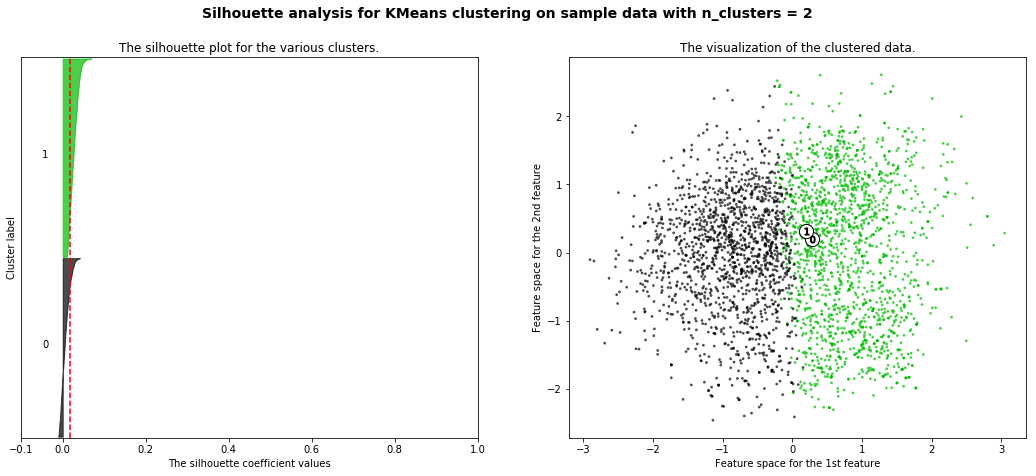

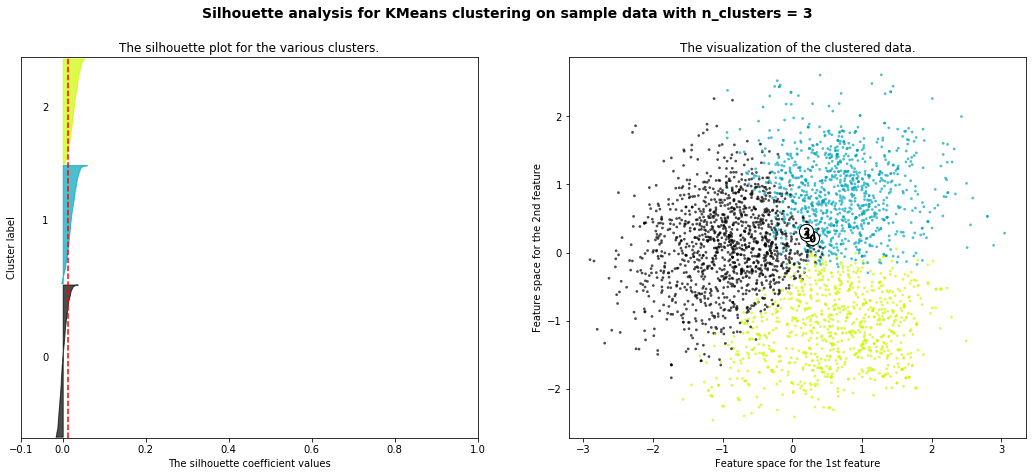

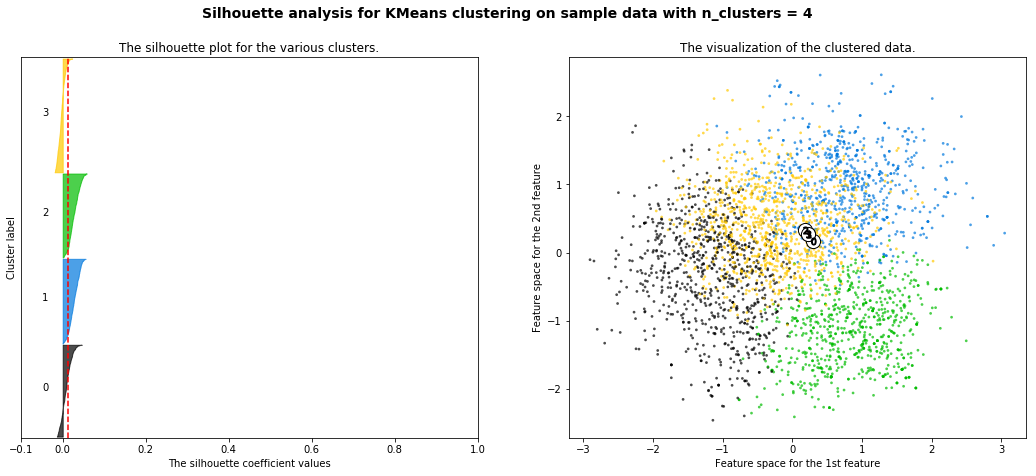

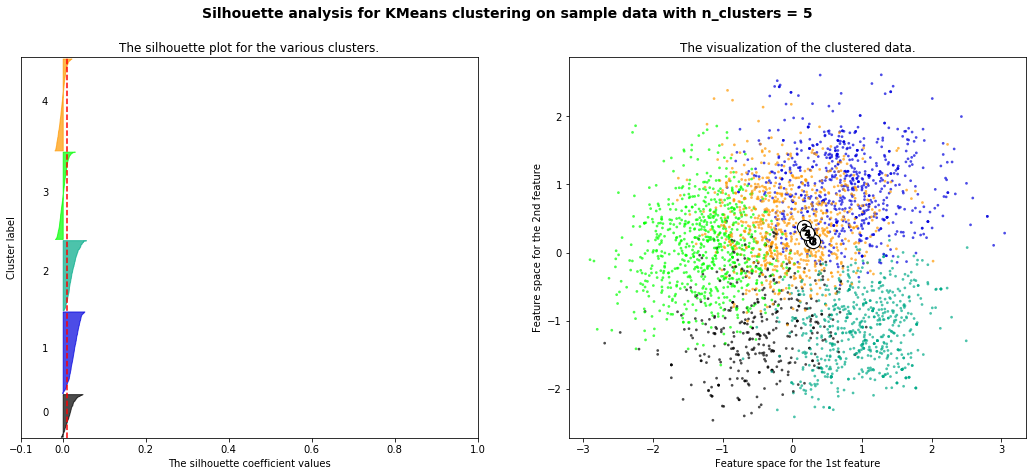

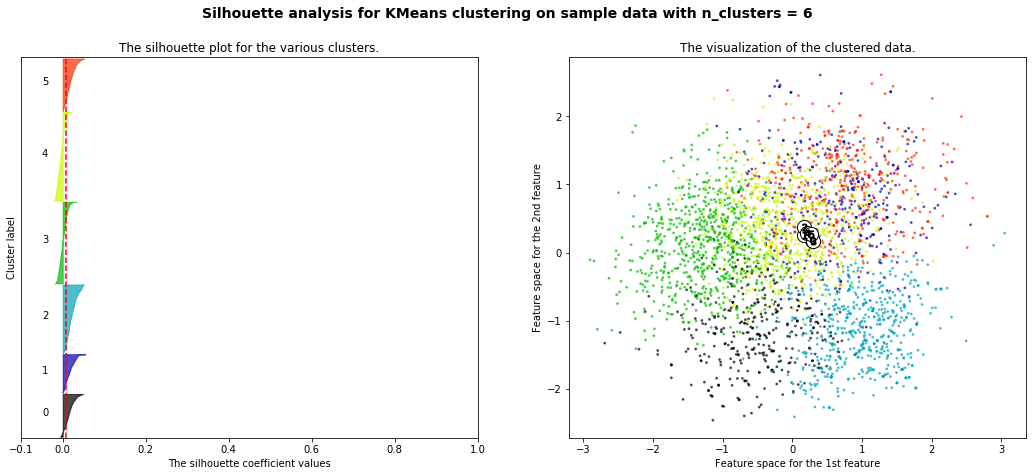

In [21]:
from cluster.metrics import silhouette

cat_features = list(range(len(features)))
range_n_clusters = [2, 3, 4, 5, 6]


silhouette(df_features_OHE, pd.DataFrame(df_pca),
           alg='kmeans', range_clusters=range_n_clusters)

## K-Modes
We compute K-modes with catgorical features



In [22]:
from cluster.kmodes import KModes

best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
for r in range(20):
  kmodes = KModes(n_clusters=3, random_state=r)
  kmodes.fit(df_original[features].values)
  centroids, clusters, inertia = kmodes.centroids, kmodes.labels, kmodes.inertia
  score = adjusted_rand_score(df_original[target], clusters)
  if score > best_score:
    best_clusters = clusters
    best_centroids = centroids
    best_score = score 
    best_r = r
kmodes_clusters = best_clusters
best_score


/home/guess/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.039010159016738696

In [23]:
print(get_metrics(y_encoded, kmodes_clusters, df_OHE[features_OHE], alg='kmodes'))

{'ars': 0.039010159016738696, 'purity': 0.5188087774294671, 'db': 7.941083743026025, 'f-measure': 0.4335423197492163, 'silhouette': 0.022294664333215742}


In [24]:
silhouette_score(df_LE[features_LE], kmodes_clusters, metric='hamming')

0.022294664333216287

For visualizing the clustering results we are going to plot the one-hot encoded data but painted with clustering assignation obtained from k-modes


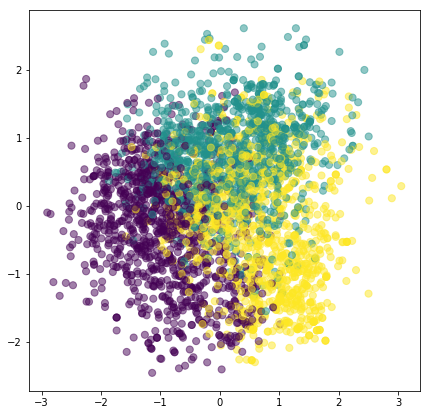

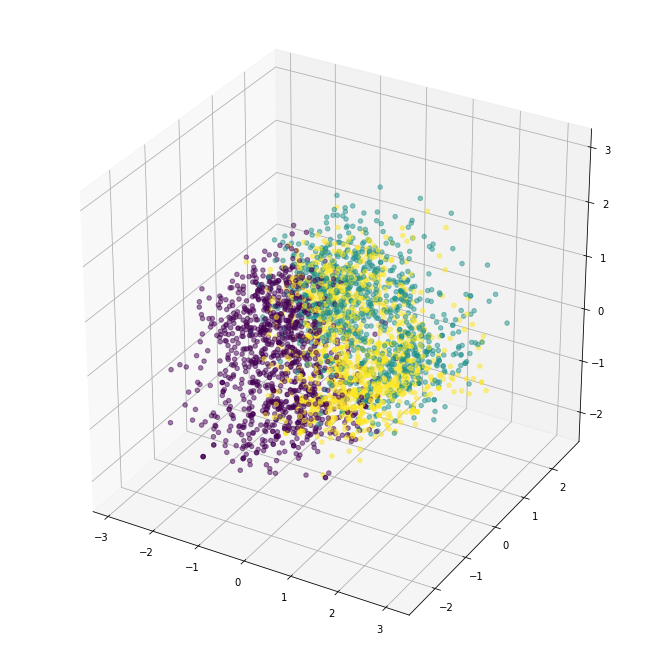

In [25]:
centroids
pca_df = pd.DataFrame(pca.transform(df_OHE[features_OHE]))
plt.scatter(pca_df.values[:, 0],pca_df.values[:, 1], c=kmodes_clusters,
            s=50, cmap='viridis', alpha=0.5);
# pca_centroids = pca.transform(centroids)
# plt.scatter(pca_centroids[:,0], pca_centroids[:,1], marker='x', c='r', s=200);

f = plt.figure(figsize=(9,9))
ax = Axes3D(f)
ax.scatter(df_pca3[:,0], df_pca3[:,1], df_pca3[:,2], c=kmodes_clusters, alpha=0.5)
plt.show()

We can see that there is some visual clustering result but the metric score shows bad performance.


/home/guess/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


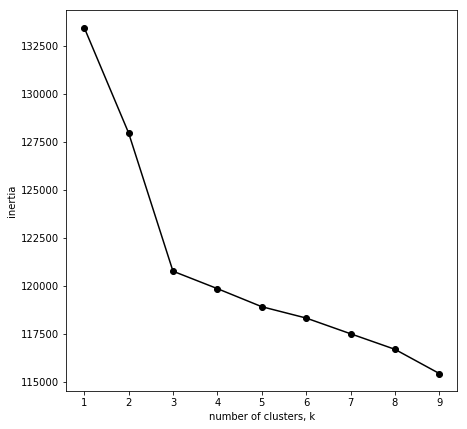

In [26]:
inertias = []

ks = list(range(1,10))
for k in ks:

    kmodes = KModes(n_clusters=k, random_state=best_r)
    kmodes.fit(df_original[features].values)
    centroids, clusters, inertia_ = kmodes.centroids, kmodes.labels, kmodes.inertia
    inertias.append(inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Notice clear elbow on k=3


## K-Prototypes


In [27]:
from cluster.kprototypes import KPrototypes

best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
cat_features = list(range(len(features)))
for r in range(25):
  kp = KPrototypes(n_clusters=3, cat_features=cat_features, random_state=r)
  kp.fit(df_original[features].values)
  clusters = kp.labels
  score = adjusted_rand_score(df_original[target], clusters)
  if score > best_score:
    best_clusters = clusters
    best_centroids = kp.centroids
    best_score = score 
    best_r = r
r_kproto = best_r
kprototypes_clusters = best_clusters
best_score




0.08532606252603088

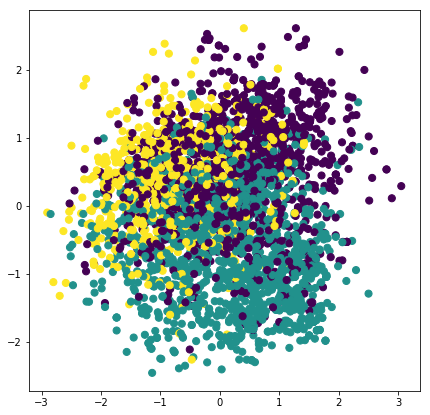

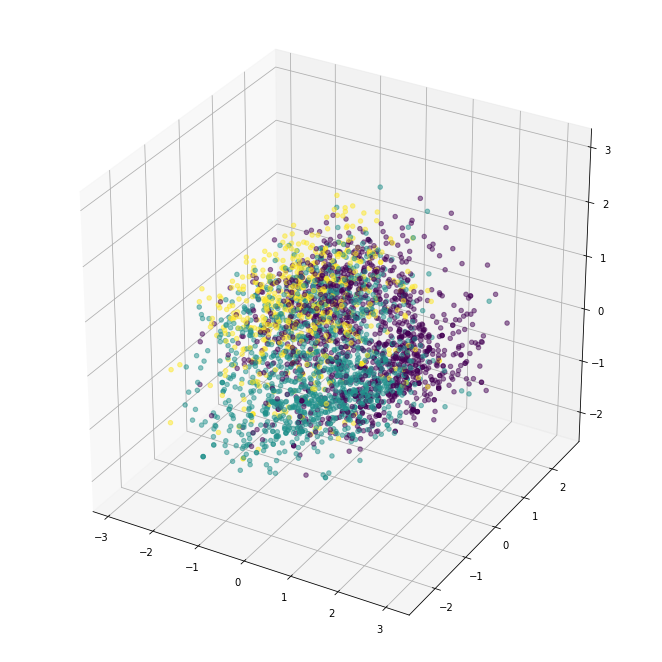

In [28]:
pca_df = pd.DataFrame(pca.transform(df_OHE[features_OHE]))
plt.scatter(pca_df.values[:, 0], pca_df.values[:, 1], c=kprototypes_clusters,
            s=50, cmap='viridis');
# plt.scatter(best_centroids[:,0], best_centroids[:,1], marker='x', c='r', s=200);
plt.show()

f = plt.figure(figsize=(9,9))
ax = Axes3D(f)
ax.scatter(df_pca3[:,0], df_pca3[:,1], df_pca3[:,2], c=kprototypes_clusters, alpha=0.5)
plt.show()

/home/guess/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


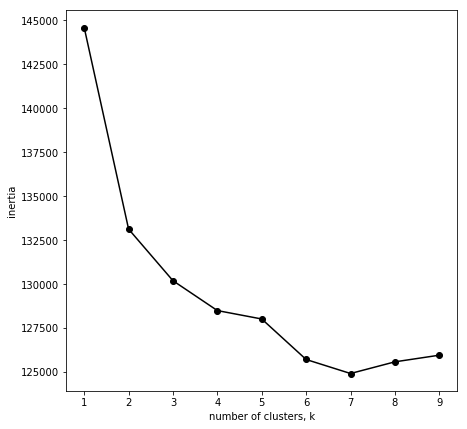

In [29]:
inertias = []

ks = list(range(1,10))
cat_features = list(range(len(features)))
for k in ks:
    kp = KPrototypes(n_clusters=k, cat_features=cat_features, random_state=r_kproto)
    kp.fit(df_original[features].values)

    inertias.append(kp.inertia)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## Fuzzy C-Means


In [30]:
# NORMALIZE CLUSTERS AND THE ASSIGNED CLUSTER FOR EACH DATA POINT USING THE FCM CRITERIUM: 

def U_normalized(U):
	"""
	This function de-fuzzifies the U. It replace the max value of each data point list for a 1 and the others are replaced by 0.
  """
	for i in range(0,len(U)):
		maximum = max(U[i])
		for j in range(0,len(U[0])):
			if U[i][j] != maximum:
				U[i][j] = 0
			else:
				U[i][j] = 1
	return U

def clusters_fcm(Un):
  """
  This function computes an array with the assigned cluster of each datapoint after performing the FCM algorithm. 
  """ 
	
  clust = []
  for i in range(len(Un)):
    if Un[i][0] == 1:
      clust.append(0)
    elif Un[i][1] == 1:
      clust.append(1)
    else:
      clust.append(2)
  
  return np.array(clust)

In [31]:
from cluster.fuzzycmeans import FuzzyCMeans, FuzzyCMeans2
best_clusters = None
best_centroids = None
best_r = None
best_score = -9999

max_iter = 100
toleration = 0.01

for r in range(0,5):
  fcm = FuzzyCMeans2(n_clusters=3, random_state=r,m=2,max_iter=max_iter,toleration=toleration)
  fcm.fit(df_OHE[features_OHE].values)
  U,V = fcm.U, fcm.V
  # clusters = fcm.labels
  # centroids = fcm.centroids
  # score = adjusted_rand_score(df_OHE[target], clusters)
  # score = adjusted_rand_score(df_original[target], clusters)
  Un = U_normalized(U)
  clusters = clusters_fcm(Un)
  centroids = np.array(V)
  score = adjusted_rand_score(df_OHE[target], clusters)
  if score > best_score:
    best_clusters = clusters
    best_centroids = centroids
    best_score = score 
    best_r = r
r_fuzzy = best_r
fuzzy_centroids = best_centroids
fuzzy_c_means_clusters = best_clusters
best_score

0.18062966393299418

In [33]:
# Best C for the Fuzzy C means algorithm: 
from sklearn.metrics import silhouette_score
for k in range(2,5):
    fcm = FuzzyCMeans2(n_clusters = k,random_state = best_r,m = 2,max_iter = 10,toleration = 0.01)
    fcm.fit(df_OHE[features_OHE].values)
    U = fcm.U
    Un = U_normalized(U)
    clusters = clusters_fcm(Un)
    print('Number of clusters FCM =',k,'--> Silhouette score:',silhouette_score(df_OHE[features_OHE].values,clusters))

Number of clusters FCM = 2 --> Silhouette score: 0.007638766971555831
Number of clusters FCM = 3 --> Silhouette score: 0.006396823868168626
Number of clusters FCM = 4 --> Silhouette score: 0.002059408805734966


In [ ]:
# Representations
pca_df = pd.DataFrame(pca.transform(df_OHE[features_OHE]))
plt.scatter(pca_df.values[:, 0], pca_df.values[:, 1], c=fuzzy_c_means_clusters,s=50, cmap='viridis', alpha=0.5);
pca_centroids = pca.transform(fuzzy_centroids)
plt.scatter(pca_centroids[:,0], pca_centroids[:,1], marker='x', c='r', s=200);

f = plt.figure(figsize=(9,9))
ax = Axes3D(f)
ax.scatter(df_pca3[:,0], df_pca3[:,1], df_pca3[:,2], c=fuzzy_c_means_clusters, alpha=0.5)
plt.show()

## Test accuracy


## Supervised validaion

We can use accuracy, precision, recall as we know the real clusters


## Unsupervised validation
- Internal index (we want to minimaze or maximize the index)

  - Variance of clusters
  - F-ratio
  - ...
- External index
  - Entropy
  - Purity
  - F-Measure
  - Mutual Information
  -  Pair-counting measures:

    a) Pairs that are in the same cluster under both algorithms 

    b) Pairs that are in the same cluster under P (predicted) and different under G (ground truth)

    c) Pairs that are in different clusters in P and the same in G.

    d) Pairs that are different cluster in P and G

    RandIndex, AdjustedRandIndex, Chi-Squared Coefficient 



In [ ]:
def rename_labels(y_true, y_pred):
    from scipy.stats import mode
    mapping = {}
    for cat in set(y_true):
      predictions = y_pred[y_true == cat]
      predictions = [p for p in predictions if p not in list(mapping.values())]
      mapping[cat] = mode(predictions)[0][0]
    # print(mapping)
    
    result = y_pred.copy()
    for cat in set(y_true):
      result[y_pred == mapping[cat]] = cat
    return result

In [ ]:
from collections import Counter

print(kmeans_clusters[:30])


In [ ]:
count_clusters = Counter(rename_labels(y_encoded, kmeans_clusters))
sns.barplot(list(count_clusters.keys()), list(count_clusters.values()), alpha=0.9);

In [ ]:
y = df_OHE[target]
y.values[:30]


In [ ]:
count_y = Counter(y.values)
sns.barplot(list(count_y.keys()), list(count_y.values()), alpha=0.9);

count_y

## Validation metrics

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score, mutual_info_score, silhouette_score, adjusted_rand_score, cluster, f1_score, davies_bouldin_score

In [ ]:
print(adjusted_rand_score(df_original[target],  kmeans_clusters))
print(adjusted_rand_score(df_original[target],  kmodes_clusters))
print(adjusted_rand_score(df_original[target],  kprototypes_clusters))
print(adjusted_rand_score(df_original[target],  fuzzy_c_means_clusters))

In [ ]:
f1_score(df_OHE[target], kprototypes_clusters, average='micro' )

In [ ]:
print(davies_bouldin_score(df_OHE[features_OHE], kmeans_clusters))
print(davies_bouldin_score(df_OHE[features_OHE], fuzzy_c_means_clusters))

In [ ]:
print(adjusted_mutual_info_score(df_original[target],  kmeans_clusters))
print(adjusted_mutual_info_score(df_original[target],  kmodes_clusters))
print(adjusted_mutual_info_score(df_original[target],  kprototypes_clusters))
print(adjusted_mutual_info_score(df_original[target],  fuzzy_c_means_clusters))

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = cluster.contingency_matrix(y_true,  y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

print(purity_score(y_encoded, kmeans_clusters))
print(purity_score(y_encoded, kmodes_clusters))
print(purity_score(y_encoded, kprototypes_clusters))
print(purity_score(y_encoded, fuzzy_c_means_clusters))

Cluster quality is better for k-means with one-hot encoding than with k-modes on categorical/nominal encoding for this dataset.


## Confussion matrix


#### K-means confussion matrix and accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score


print(confusion_matrix(y_encoded, rename_labels(y_encoded, kmeans_clusters)))
print(accuracy_score(y_encoded, rename_labels(y_encoded, kmeans_clusters)))


#### All metrics summary

In [ ]:
from cluster.metrics import get_metrics

print(get_metrics(y_encoded, rename_labels(y_encoded,agglo_clusters), df_OHE[features_OHE], alg='agglo'))
print(get_metrics(y_encoded, rename_labels(y_encoded,kmeans_clusters), df_OHE[features_OHE], alg='kmeans'))
print(get_metrics(y_encoded, rename_labels(y_encoded,kmodes_clusters), df_OHE[features_OHE], alg='kmodes'))
print(get_metrics(y_encoded, rename_labels(y_encoded,kprototypes_clusters), df_OHE[features_OHE], alg='kproto'))
print(get_metrics(y_encoded, rename_labels(y_encoded,fuzzy_c_means_clusters), df_OHE[features_OHE], alg='fuzzy'))